In [1]:
import os
from os import path as op
import mne
from library import config, helpers

In [72]:
subID = 'VME_S01'
# data = mne.read_epochs(fname=op.join(config.paths['02_epochs'], subID + '-stimon-epo.fif'))
raw = helpers.load_data(subID + '-prepared',
                            config.paths['01_prepared'],
                            append='-raw')
epos_stimon = helpers.load_data(subID + '-stimon',
                            config.paths['02_epochs'],
                            append='-epo',
                            verbose=False)

Opening raw data file /raven/ptmp/fklotzsche/Experiments/vMemEcc/Data2022/DataMNE/EEG/01_prepared/VME_S01-prepared-raw.fif...
    Range : 0 ... 4353149 =      0.000 ...  8706.298 secs
Ready.
Reading /raven/ptmp/fklotzsche/Experiments/vMemEcc/Data2022/DataMNE/EEG/02_epochs/VME_S01-stimon-epo.fif ...
    Found the data of interest:
        t =    -600.00 ...    2300.00 ms
        0 CTF compensation matrices available
Not setting metadata
Not setting metadata
720 matching events found
No baseline correction applied
0 projection items activated


Reading 0 ... 4353149  =      0.000 ...  8706.298 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.01 - 40 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.01
- Lower transition bandwidth: 0.01 Hz (-6 dB cutoff frequency: 0.01 Hz)
- Upper passband edge: 40.00 Hz
- Upper transition bandwidth: 10.00 Hz (-6 dB cutoff frequency: 45.00 Hz)
- Filter length: 165001 samples (330.002 sec)



[Parallel(n_jobs=8)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  10 tasks      | elapsed:    1.0s
[Parallel(n_jobs=8)]: Done  60 out of  60 | elapsed:    4.5s finished


Effective window size : 4.096 (s)


[Parallel(n_jobs=8)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done   3 out of   8 | elapsed:    2.0s remaining:    3.4s
[Parallel(n_jobs=8)]: Done   5 out of   8 | elapsed:    2.5s remaining:    1.5s
[Parallel(n_jobs=8)]: Done   8 out of   8 | elapsed:    3.3s finished


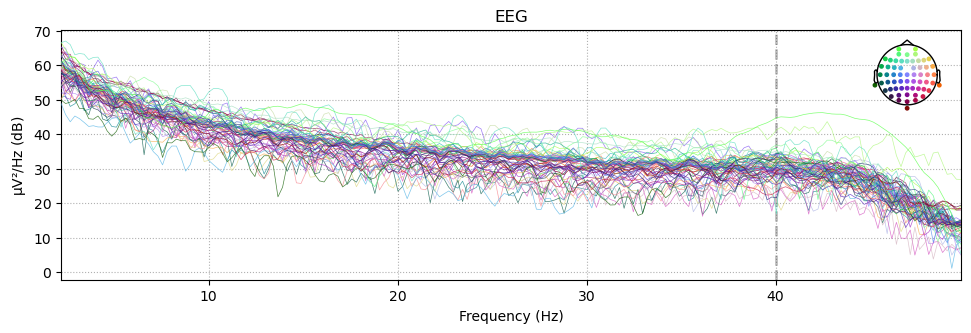

In [56]:
%matplotlib qt
raw.copy().load_data().\
    filter(l_freq=0.01, h_freq=40, n_jobs=8).\
    plot_psd(fmin=2, fmax=50, n_jobs=8, dB=True)


    Using multitaper spectrum estimation with 7 DPSS windows


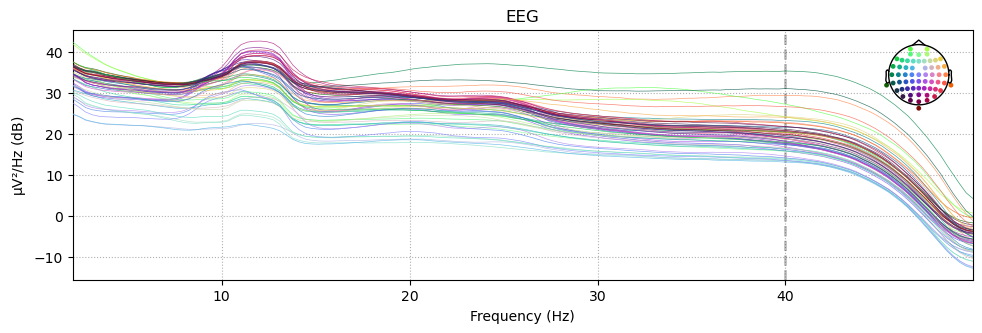

In [67]:
epos_stimon.plot_psd(fmin=2, fmax=50, n_jobs=8, dB=True)

Reading 0 ... 3923529  =      0.000 ...  7847.058 secs...
Filtering raw data in 1 contiguous segment
Setting up low-pass filter at 40 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal lowpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Upper passband edge: 40.00 Hz
- Upper transition bandwidth: 10.00 Hz (-6 dB cutoff frequency: 45.00 Hz)
- Filter length: 165 samples (0.330 sec)



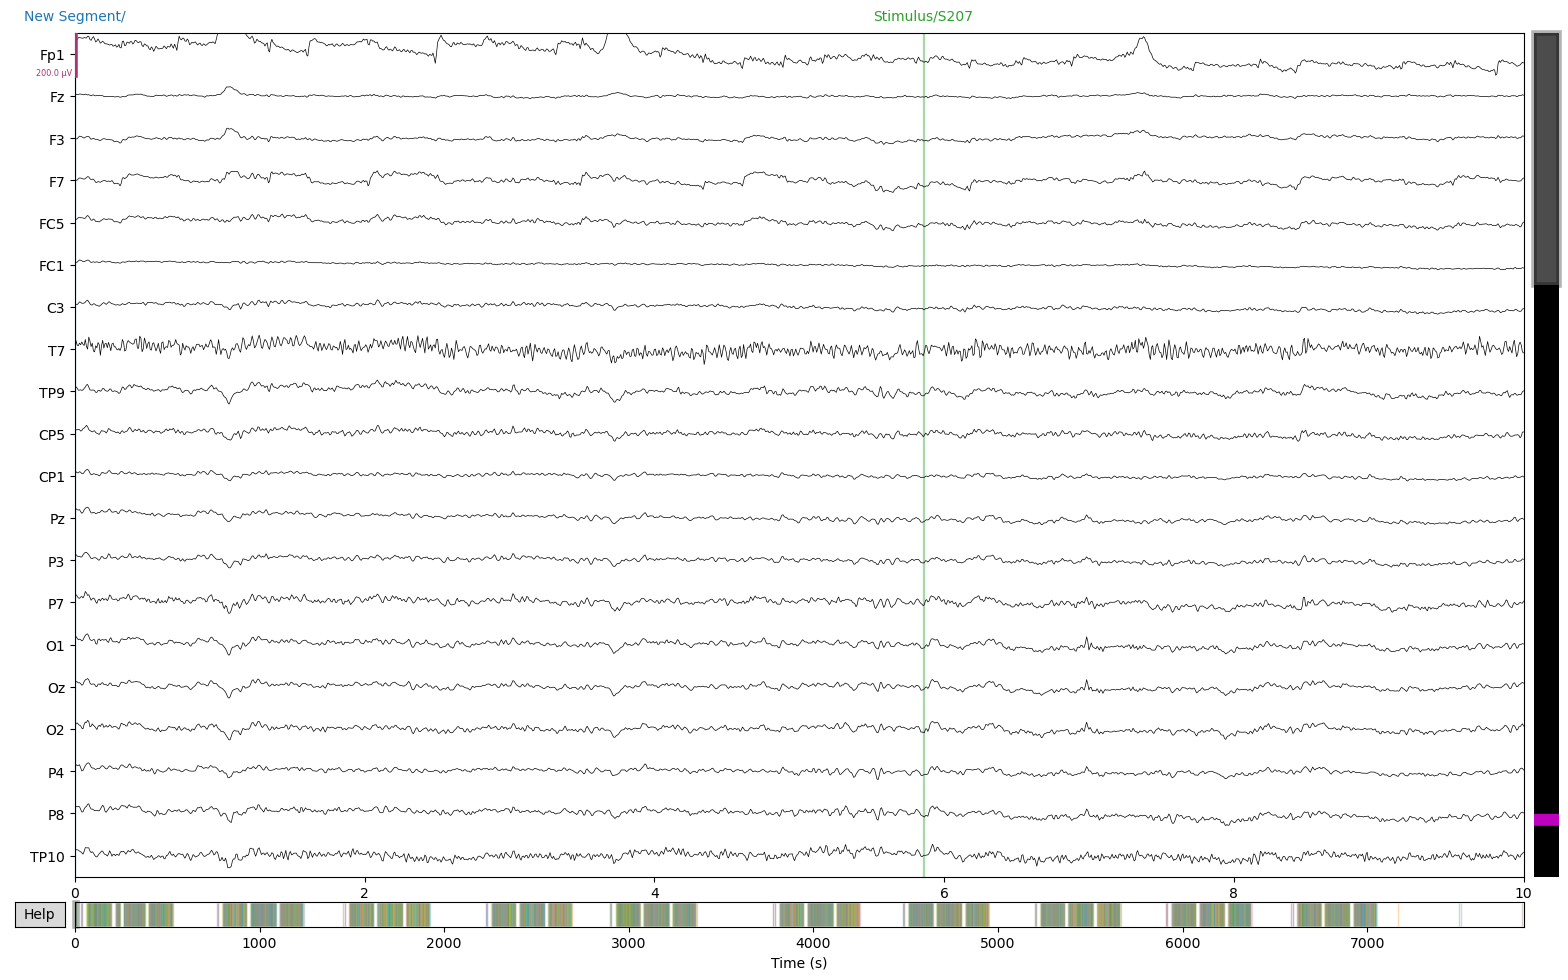

Channels marked as bad: ['ECG']


In [64]:
raw.copy().load_data().\
     filter(l_freq=None,h_freq=40,
                   picks=['eeg', 'eog']).\
     plot(scalings={'eog':100e-6, 'eeg':100e-6, 'misc':100e-6})#,

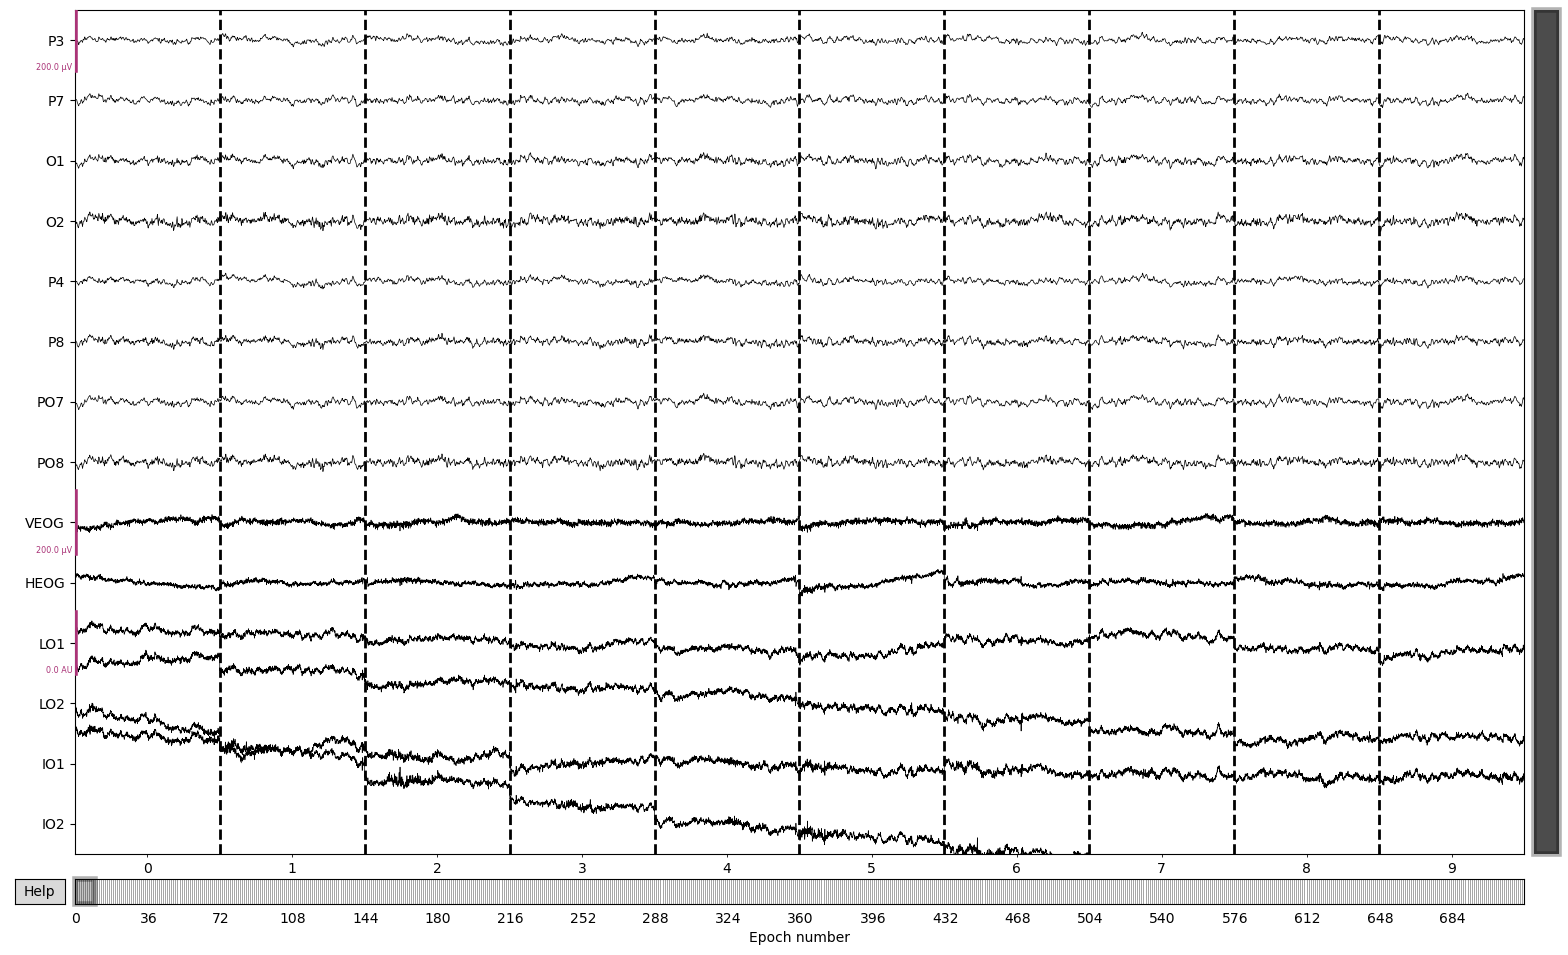

Dropped 0 epochs: 
Channels marked as bad: none


In [73]:
picks = ['VEOG', 'HEOG', 'IO1', 'IO2', 'LO1', 'LO2', 'PO8', 'PO7', 'P3', 'P4', 'P7', 'P8', 'O1', 'O2']
epos_stimon.copy().load_data().\
     plot(scalings={'eog':100e-6, 'eeg':100e-6, 'misc':100e-6},
          picks=picks,
          n_epochs=10)

In [3]:
for l_freq in [0.01, 0.05, 0.1, 0.5]:
    for part in ["stimon", "cue", "fulllength"]:
        old_dir = op.join(config.paths['02_epochs'], str(l_freq), part)
        new_dir = op.join(config.paths['02_epochs'], str(l_freq), part, 'bl200')
        helpers.chkmk_dir(new_dir)
        files = os.listdir(old_dir)
        files = [f for f in files if op.isfile(op.join(old_dir, f))]
        for f in files:
            os.rename(op.join(old_dir, f), op.join(new_dir, f))



creating dir: /raven/ptmp/fklotzsche/Experiments/vMemEcc/Data2022/DataMNE/EEG/02_epochs/0.01/stimon/bl200
creating dir: /raven/ptmp/fklotzsche/Experiments/vMemEcc/Data2022/DataMNE/EEG/02_epochs/0.01/cue/bl200
creating dir: /raven/ptmp/fklotzsche/Experiments/vMemEcc/Data2022/DataMNE/EEG/02_epochs/0.01/fulllength/bl200
creating dir: /raven/ptmp/fklotzsche/Experiments/vMemEcc/Data2022/DataMNE/EEG/02_epochs/0.05/stimon/bl200
creating dir: /raven/ptmp/fklotzsche/Experiments/vMemEcc/Data2022/DataMNE/EEG/02_epochs/0.05/cue/bl200
creating dir: /raven/ptmp/fklotzsche/Experiments/vMemEcc/Data2022/DataMNE/EEG/02_epochs/0.05/fulllength/bl200
creating dir: /raven/ptmp/fklotzsche/Experiments/vMemEcc/Data2022/DataMNE/EEG/02_epochs/0.1/stimon/bl200
creating dir: /raven/ptmp/fklotzsche/Experiments/vMemEcc/Data2022/DataMNE/EEG/02_epochs/0.1/cue/bl200
creating dir: /raven/ptmp/fklotzsche/Experiments/vMemEcc/Data2022/DataMNE/EEG/02_epochs/0.1/fulllength/bl200
creating dir: /raven/ptmp/fklotzsche/Experimen

In [47]:
%matplotlib qt
all_evos = []
#for epo_part in ''
fpath = op.join(config.paths['03_preproc-ar'], '0.1', 'stimon', 'cleaneddata')
files = os.listdir(fpath)
revos_dict = {}
revos_dict['Ipsi'] = []
revos_dict['Contra'] = []
levos_dict = {}
levos_dict['Ipsi'] = []
levos_dict['Contra'] = []
for f in files:
    dat = mne.read_epochs(op.join(fpath, f), verbose=False)
    #evos_dict['LoadLow'].append(dat[config.event_dict['CueL']][config.event_dict['LoadLow']].average())
    #evos_dict['LoadHigh'].append(dat[config.event_dict['CueL']][config.event_dict['LoadHigh']].average())
    revos_dict['Contra'].append(dat[config.event_dict['CueL']].pick_channels(config.chans_CDA_dict['Right']).average())
    revos_dict['Ipsi'].append(dat[config.event_dict['CueR']].pick_channels(config.chans_CDA_dict['Right']).average())
    levos_dict['Contra'].append(dat[config.event_dict['CueR']].pick_channels(config.chans_CDA_dict['Left']).average())
    levos_dict['Ipsi'].append(dat[config.event_dict['CueL']].pick_channels(config.chans_CDA_dict['Left']).average())
    #evos_dict['LoadLow'].append(dat[config.event_dict['CueR']][config.event_dict['LoadLow']].average())
    #evos_dict['LoadHigh'].append(dat[config.event_dict['CueR']][config.event_dict['LoadHigh']].average())
#dat.plot(picks=['eeg', 'eog'])


In [78]:
import matplotlib.pyplot as plt
#evo = dat.copy().average().set_eeg_reference()
#evos_d = {'ha': evos}
#evos_d['0.01'] = evos

for k in revos_dict:
    for r,l in zip(revos_dict[k], levos_dict[k]):
        r.crop(-0.2,2.2)
        l.crop(-0.2,2.2)

fig, axs = plt.subplots(1,2)
rfig = mne.viz.plot_compare_evokeds(revos_dict,
                                    combine='mean',
                                    axes=axs[1],
                                    title='Right sensors',
                                    legend=False,
                                    show_sensors=True,
                                    colors={k: config.colors[k] for k in ['Ipsi', 'Contra']},
                                    ylim=dict(eeg=[-10, 5]))
lfig = mne.viz.plot_compare_evokeds(levos_dict,
                                    combine='mean',
                                    axes=axs[0],title='Left sensors',
                                    show_sensors=True,
                                    legend=3,
                                    colors={k: config.colors[k] for k in ['Ipsi', 'Contra']},
                                    ylim=dict(eeg=[-10, 5]))
#evo.pick_channels(config.chans_CDA_all).plot(combine='mean')

combining channels using "mean"
combining channels using "mean"
combining channels using "mean"
combining channels using "mean"


combining channels using "gfp"


[<Figure size 800x600 with 1 Axes>]

Traceback (most recent call last):
  File "/u/fklotzsche/conda-envs/mne/lib/python3.9/site-packages/matplotlib/backends/backend_qt.py", line 455, in _draw_idle
    self.draw()
  File "/u/fklotzsche/conda-envs/mne/lib/python3.9/site-packages/matplotlib/backends/backend_agg.py", line 436, in draw
    self.figure.draw(self.renderer)
  File "/u/fklotzsche/conda-envs/mne/lib/python3.9/site-packages/matplotlib/artist.py", line 73, in draw_wrapper
    result = draw(artist, renderer, *args, **kwargs)
  File "/u/fklotzsche/conda-envs/mne/lib/python3.9/site-packages/matplotlib/artist.py", line 50, in draw_wrapper
    return draw(artist, renderer)
  File "/u/fklotzsche/conda-envs/mne/lib/python3.9/site-packages/matplotlib/figure.py", line 2810, in draw
    mimage._draw_list_compositing_images(
  File "/u/fklotzsche/conda-envs/mne/lib/python3.9/site-packages/matplotlib/image.py", line 132, in _draw_list_compositing_images
    a.draw(renderer)
  File "/u/fklotzsche/conda-envs/mne/lib/python3.9/site

In [8]:
old_dir

'/raven/ptmp/fklotzsche/Experiments/vMemEcc/Data2022/DataMNE/EEG/02_epochs/0.5/fulllength'

In [80]:
[-1]*3

[-1, -1, -1]